## Hypothesis Testing: to make better decisions in a field

- $H_{0}$ usually states there is no effect or that two groups are equal.
- $H_{1}$ is what we would like to prove to be true - Reject the $H_{0}$
- We cosider parameters of population and not any sample
- $H_{0}$ : Null Hypothesis - we believe to be true before we collect any data
- $H_{1}$ : Alternative - what we want to prove to be true - should be competiting and non-overlapping
- $H_{0}$ : = or ≤ or ≥
- $H_{1}$ : ≠ or < or >
- 'Innocent until proven guilty'
    - $H_{0}$ - Everyone is innocent before we collect any data
    - $H_{1}$ - Individual is guilty
    - We then collect data and check which hypothesis is supported
    - Truth: Innocent, Decision: Guilty - Type I error
    - Truth: Guilty, Decision: Innocent - Type II error
- Web traffic increased for new page when compared to old page?
    - We expect the new page to be consuming more traffic(more users, the better) where µ         is avg web traffic
    - $H_{0}$ - $µ_{new}$≤$µ_{old}$ - We want to reject this
    - $H_{1}$ - $µ_{new}$>$µ_{old}$ - Better µ for the new page
    - Because we wanted to test if a new page was better than an existing page, we set that up in the alternative.         Two indicators are that the null should hold the equality, and the statement we would like to be true should be       in the alternative. Here, $µ_{new}$ represents the population mean return from the new page. Similarly,              $µ_{old}$ represents the population mean return from the old page.
- Most of the time $H_{1}$ is same as problem statement, $H_{0}$ is the opposite. This totally depends on the problem
- Type I error :  Deciding $H_{1}$ is true, but $H_{0}$ is actually true - False positive - $\alpha$
- Type II error : Deciding $H_{0}$ is true, but $H_{1}$ is actually true - False Negative - $\beta$
- Generally a threshold is set for committing maximum Type II error
Screenshot 2020-04-07 at 16.21.37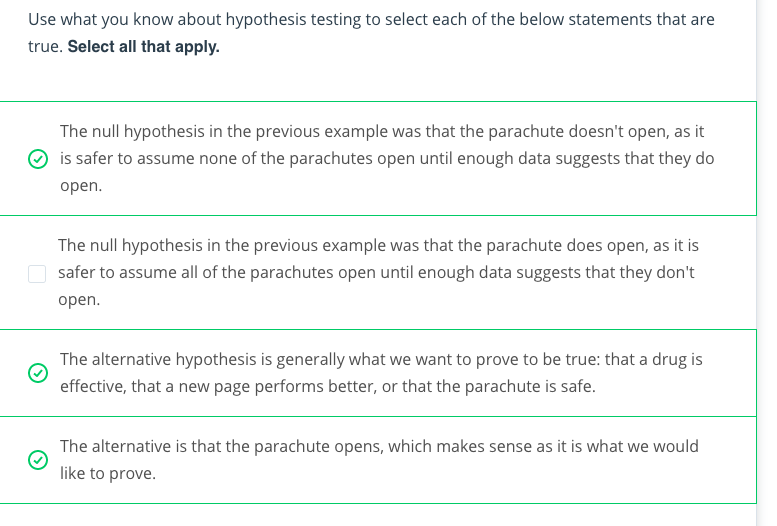
- Type I error : $\alpha$ = 0.05 : committing mistakes every 5 out of 100 individuals can be fatal
- Choose a type I error threshold, and your hypothesis tests will be created to minimize the type II errors after       ensuring the type I error rate is met.
Screenshot 2020-04-07 at 16.32.29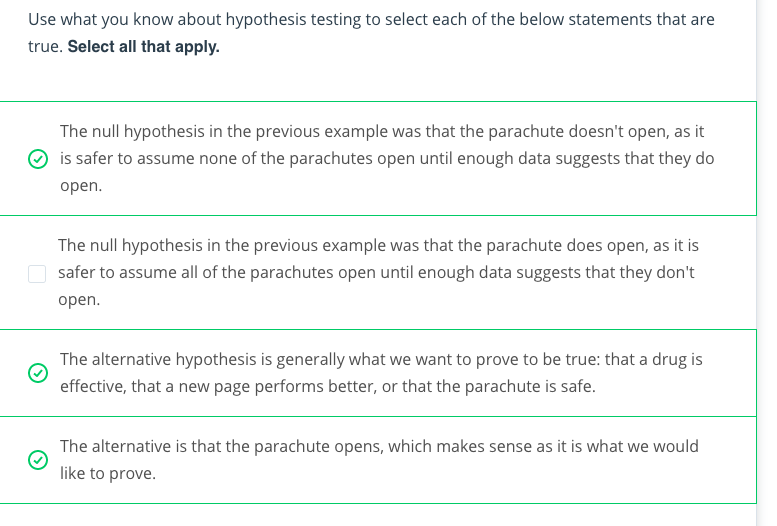

- Can I expect a return of more than 6% on an investment?
    - $H_{0}$: µ ≤ 6
    - $H_{1}$: µ > 6
- Which of the marketing ads will drive more traffic to my website?
    - $H_{0}$: $π_{new}$ ≤ $π_{old}$
    - $H_{1}$: $π_{new}$ > $π_{old}$
    - π: number of people who click the advertisement

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
coffee_df = pd.read_csv('../data/coffee_dataset.csv')
coffee_df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


#### question : Is average height of all population(both coffee drinkers and non-coffee drinkers) greater than 70 inches? 
- $\mu$ = mean height of the population
- $H_{0}$ : $\mu$ <= 70
- $H_{1}$ : $\mu$ > 70
- Check if the interval falls in the null hypothesis space or in the alternative hypothesis   space to choose which hypothesis you believe to be true.

##### Method 1

In [22]:
coffee_df_sample = coffee_df.sample(200,replace=True)
coffee_df_sample_means = []
for i in range(10000):
    boot_sample_each = coffee_df_sample.sample(200,replace=True)
    height_mean = boot_sample_each['height'].mean()
    coffee_df_sample_means.append(height_mean)

low, upper = np.percentile(coffee_df_sample_means,2.5), np.percentile(coffee_df_sample_means,97.5)
print(low, upper)

67.08918281378872 67.96334478250168


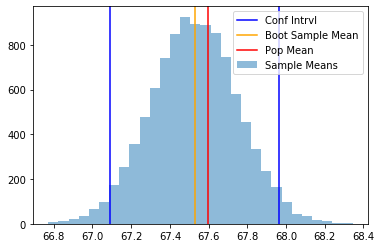

In [23]:
plt.hist(coffee_df_sample_means,alpha=0.5,bins=30, label='Sample Means')
plt.axvline(low,color='b',label='Conf Intrvl')
plt.axvline(upper,color='b')
plt.axvline(np.mean(coffee_df_sample_means),color='orange',label='Boot Sample Mean')
plt.axvline(coffee_df['height'].mean(),color='r',label='Pop Mean')
plt.legend(loc='upper right')

In [13]:
# our interval was entirely below 70, which would suggest the null (the population mean is less than 70) 
# is actually true.

##### Method 2

In [4]:
coffee_df_sample = coffee_df.sample(200,replace=True)
coffee_df_sample_means = []
for i in range(10000):
    boot_sample_each = coffee_df_sample.sample(200,replace=True)
    height_mean = boot_sample_each['height'].mean()
    coffee_df_sample_means.append(height_mean)

'SD for the sample mean is {0:.2f}'.format(np.std(coffee_df_sample_means))

'SD for the sample mean is 0.22'

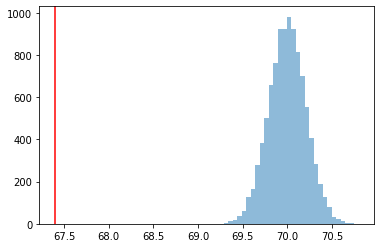

In [33]:
# We are centered at 70 as this the point where we want to bifurcate our hypothesis
# H0 <= 70, so we choose 70 as the mean and check it the sample height mean is <=70 or >70
h0_values = np.random.normal(70, np.std(coffee_df_sample_means), 10000)
plt.hist(h0_values,alpha=0.5,bins=30)
plt.axvline(coffee_df_sample['height'].mean(), color='r')

In [1]:
# Sample mean falls far before from the normal distribution 

In [32]:
coffee_df_sample['height'].mean()

67.39315560982325

- If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee     drinkers, what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the first quiz question below.
    - H0 = $\mu_{heightdrnk}$ = $\mu_{heightnondrnk}$
    - H1 = $\mu_{heightdrnk}$ ≠ $\mu_{heightnondrnk}$

- If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers,  what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the second quiz question below.
    - H0 = $\mu_{heightdrnk}$ ≥ $\mu_{heightnondrnk}$
    - H1 = $\mu_{heightdrnk}$ < $\mu_{heightnondrnk}$

In [4]:
# For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee 
# drinkers, and calculate the difference in means for each sample. You will want to have three arrays at the end of the 
# iterations - one for each mean and one for the difference in means. Use the results of your sampling distribution, 
# to answer the third quiz question below

coffee_df_sample = coffee_df.sample(200)
height_coffee_df_diff_sample_means = []
height_drink_df_sample_means = []
height_not_drink_df_sample_means = []
for i in range(10000):
    boot_means = coffee_df_sample.sample(200, replace=True)
    X1 = boot_means[boot_means['drinks_coffee']==True].mean()['height']
    X2 = boot_means[boot_means['drinks_coffee']==False].mean()['height']
    height_drink_df_sample_means.append(X1)
    height_not_drink_df_sample_means.append(X2)
    height_coffee_df_diff_sample_means.append(X1-X2)

# Standard Deviations
print(np.std(height_drink_df_sample_means))
print(np.std(height_not_drink_df_sample_means))
print(np.std(height_coffee_df_diff_sample_means))

0.2539116916654127
0.4601794778212942
0.5285497337422282


In [5]:
print(np.mean(height_drink_df_sample_means))
print(np.mean(height_not_drink_df_sample_means))
print(np.mean(height_coffee_df_diff_sample_means))

68.33833232556572
66.64553759875524
1.6927947268104755


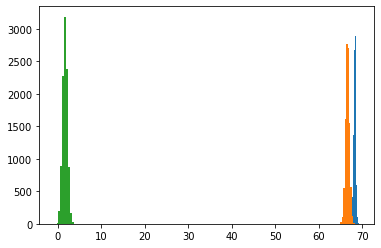

In [6]:
plt.hist(height_drink_df_sample_means);
plt.hist(height_not_drink_df_sample_means);
plt.hist(height_coffee_df_diff_sample_means);

0.9932690293645806 2.7944353655406036


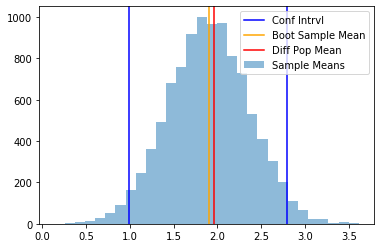

In [14]:
# Method I

low, upper = np.percentile(height_coffee_df_diff_sample_means,2.5), np.percentile(height_coffee_df_diff_sample_means,97.5)
print(low,upper)

plt.hist(height_coffee_df_diff_sample_means,alpha=0.5,bins=30, label='Sample Means')
plt.axvline(low,color='b',label='Conf Intrvl')
plt.axvline(upper,color='b')
plt.axvline(np.mean(height_coffee_df_diff_sample_means),color='orange',label='Boot Sample Mean')
plt.axvline((coffee_df[coffee_df['drinks_coffee']==True].mean()['height'] - coffee_df[coffee_df['drinks_coffee']==False].mean()['height']),
             color='r',label='Diff Pop Mean')
plt.legend(loc='upper right')

In [ ]:
# Therefore, we accept H0 as our interval in entirely above 0

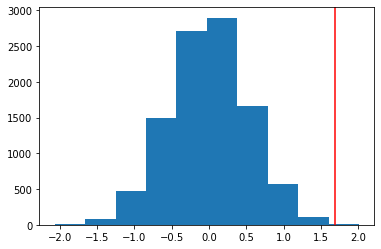

In [7]:
# Method II

# use your observed sampling distribution for the difference in means and the docs to simulate what you would 
# expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your 
# distribution at zero. Also, calculate the observed sample mean difference in sample_data. Use your solutions to 
# answer the last questions in the quiz below.
h0_values = np.random.normal(0,np.std(height_coffee_df_diff_sample_means),10000)
plt.hist(h0_values);
plt.axvline((coffee_df_sample[coffee_df_sample['drinks_coffee']==True].mean()['height'] - coffee_df_sample[coffee_df_sample['drinks_coffee']==False].mean()['height']),color='r')

# We can expect the standard deviation of the sampling distribution for differences from the null to be essentially 
# the same as what we observed from the data.x

In [11]:
np.mean(height_coffee_df_diff_sample_means)
# Here >=0 means H0 is accepted
# We accept null as the diff in sample means is far away to the right from the 
# center of normal distribution which suggests that mean height of coffee drinkers 
# is greater that mean height of non coffee drinkers

1.9005965744917768

### P-Value
   - Assume pop mean = 0 and sample mean = 5 and sample sd=2
   - area under the distribution starting from the statistic throught the tail of the distribution where the shaded 
      area is dependent on $H_{1}$

In [4]:
# H0 : µ <= 70
# H1 : µ > 70

coffee_df_sample = coffee_df.sample(200,replace=True)
coffee_df_sample_means = []
for i in range(10000):
    boot_sample_each = coffee_df_sample.sample(200,replace=True)
    height_mean = boot_sample_each['height'].mean()
    coffee_df_sample_means.append(height_mean)

In [5]:
sample_mean = coffee_df_sample['height'].mean()

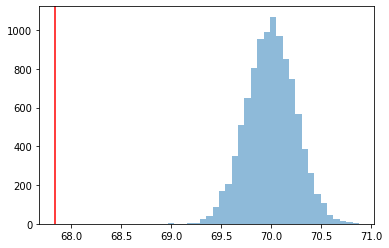

In [6]:
# We are centered at 70 as this the point where we want to bifurcate our hypothesis
h0_values = np.random.normal(70, np.std(coffee_df_sample_means), 10000)
plt.hist(h0_values,alpha=0.5,bins=30);
plt.axvline(sample_mean,color='r')
#plt.axvline(coffee_df_sample['height'].mean(), color='r')

In [7]:
#h0_values = np.random.normal(70, np.std(coffee_df_sample_means), 10000)
(h0_values>sample_mean).mean() # p-value : proprotion of the simulated draws that are larger than our sample mean
#H1: µ>70, we will look in the shaded region greater than the statistic(sample_mean)
# calculated h0 values which are greater than our sample mean
# p-value is very large so we should consider h0
# we should stay at mean being less than 70

1.0

In [50]:
print(h0_values)
print(sample_mean)

[69.6502634  69.79884935 70.07744929 ... 70.17575471 70.38698644
 69.88291316]
67.39503676568457


In [54]:
# H0 : µ >= 70
# H1 : µ < 70 : we will look in the region less than the statistic(sample_mean)
(h0_values<sample_mean).mean() # is 0, so we reject h0 and consider h1 suggesting that our pop mean is less than 70

0.0

$\mu = 70$
$\mu \neq 70$

In [58]:
(h0_values<sample_mean).mean() + (h0_values>70 + (70-sample_mean)).mean()

0.0

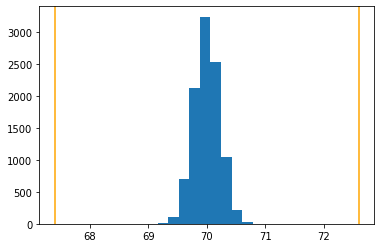

In [56]:
low = sample_mean
upper = 70 + (70-sample_mean)

plt.hist(h0_values)
plt.axvline(low,color='orange')
plt.axvline(upper,color='orange')

In [1]:
# https://www.statsdirect.com/help/basics/p_values.htm
# https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics


# The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it 
# is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists 
# when there is no actual difference.

# The significance level determines how far out from the null hypothesis value we will draw that line on the graph. 
# To graph a significance level of 0.05, we need to shade the 5% of the distribution that is furthest away from the 
# null hypothesis.

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values
# https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics
    
# If the null hypothesis is true, what is the probability that we would observe a more extreme test statistic in the direction of the alternative hypothesis than we did

# https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach



The p-value is the probability of getting our statistic or a more extreme value if the null is true.

Therefore, small p-values suggest our null is not true. Rather, our statistic is likely to have come from a different distribution than the null.

When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.

By comparing our p-value to our type I error threshold (\alphaα), we can make our decision about which hypothesis we will choose.

pval ≤ $\alpha$ ⇒ Reject $H_{0}$	 
pval > $\alpha$ ⇒ Fail to Reject $H_{0}$

In [8]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('../data/judicial_dataset_predictions.csv')
par_data = pd.read_csv('../data/parachute_dataset.csv')

In [10]:
jud_data.head()
#par_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [11]:
#Total number of errors
jud_data[jud_data['actual']!=jud_data['predicted']].shape[0]/jud_data.shape[0]

0.042152958945489497

In [13]:
#Type I error
jud_data[(jud_data['actual']=='innocent')&(jud_data['predicted']=='guilty')].shape[0]/jud_data.shape[0]

0.001510366607167376

In [33]:
#Type II error
jud_data[(jud_data['actual']=='guilty')&(jud_data['predicted']=='innocent')].shape[0]/jud_data.shape[0]

0.04064259233832212

In [37]:
#Total number of errors
par_data[par_data['actual']!=par_data['predicted']].shape[0]/par_data.shape[0]

0.039972551037913875

In [38]:
#Type I error
par_data[(par_data['actual']=='fails')&(par_data['predicted']=='opens')].shape[0]/par_data.shape[0]

0.00017155601303825698

In [39]:
#Type II error
par_data[(par_data['actual']=='opens')&(par_data['predicted']=='fails')].shape[0]/par_data.shape[0]

0.03980099502487562

Screenshot 2020-04-02 at 11.12.48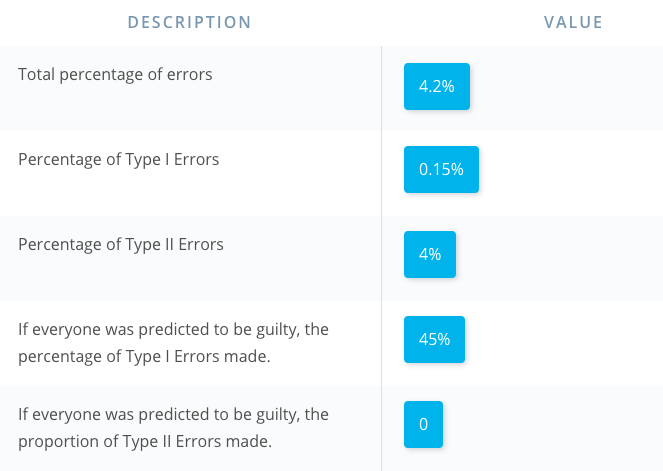

- When performing more than one hypothesis test, your type I error compounds. In order to correct for this, a common technique is called the Bonferroni correction. This correction is very conservative, but says that your new type I error rate should be the error rate you actually want divided by the number of tests you are performing.

- Therefore, if you would like to hold a type I error rate of 1% for each of 20 hypothesis tests, the Bonferroni corrected rate would be 0.01/20 = 0.0005. This would be the new rate you should use as your comparison to the p-value for each of the 20 tests to make your decision.

- Additional techniques to protect against compounding type I errors include:
    - Tukey correction
    - Q-values

- Hypothesis test and Confidence Intervals are very similar
- If $H_{1}$ has a ≠ then conclusions are very similar to hypothesis test
    - A two-sided hypothesis test (that is a test involving a ≠ in the alternative) is the same in terms of the             conclusions made as a confidence interval as long as: 1 - CI = $\alpha$
      For example, a 95% confidence interval will draw the same conclusions as a hypothesis test with a type I error       rate of 0.05 in terms of which hypothesis to choose, because: 1 - 0.95 = 0.05
- https://www.youtube.com/watch?v=z98xODInLCQ

In [15]:
np.random.seed(42)
full_data = pd.read_csv('../data/coffee_dataset.csv')

In [18]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


1. In this case imagine, we are interested in testing if the mean height of all individuals in the full_data is equal to 67.60 inches. First, use quiz 1 below to identify the null and alternative hypotheses for these cases.

$H_{0}: \mu = 67.60$  

$H_{1}: \mu \neq 67.60$

2.  What is the population mean? Create a sample set of data using the below code. What is the sample mean? What is the standard deviation of the population? What is the standard deviation of the sampling distribution of the mean of five draws? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. Use quiz 2 below to assure your answers are correct.

In [23]:
print(np.mean(full_data['height']))
print(np.std(full_data['height']))

67.59748697307937
3.1189087116821472


In [35]:
sample1 = full_data.sample(5)
print(sample1)
print(sample1['height'].mean())
print(np.std(sample1['height']))

      user_id   age  drinks_coffee     height
1149     4791   <21          False  68.770447
399      7383   <21          False  62.991729
2825     6803  >=21           True  67.931345
2471     3695  >=21           True  70.732543
360      2355   <21           True  65.148755
67.11496378126054
2.733533411839273


In [36]:
sampling_dist_mean5 = []

for _ in range(10000):
    sample_of_5 = sample1.sample(5, replace = True)
    sample_mean = sample_of_5.height.mean()
    sampling_dist_mean5.append(sample_mean)

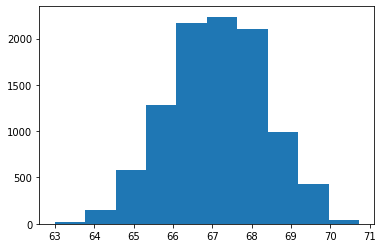

In [37]:
plt.hist(sampling_dist_mean5);

In [38]:
np.std(sampling_dist_mean5)

1.2238856560041629

`3.` Using your null and alternative hypotheses as set up in question 1 and the results of your sampling distribution in question 2, simulate values of the mean values that you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

𝐻0:𝜇=67.60 

𝐻1:𝜇≠67.60

In [39]:
sampling_dist_mean5 = np.array(sampling_dist_mean5)

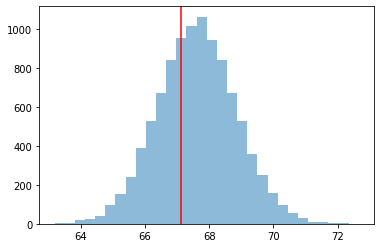

In [44]:
null_vals = np.random.normal(67.60,np.std(sampling_dist_mean5),sampling_dist_mean5.size)
plt.hist(null_vals,bins=30,alpha=0.5);
plt.axvline(sample1['height'].mean(),color='r')

In [46]:
# p-value
(null_vals>sample1['height'].mean()).mean()

0.6587

In [51]:
null_mean = 67.60  
# this is another way to compute the standard deviation of the sampling distribution theoretically  
std_sampling_dist = full_data['height'].std()/np.sqrt(5)  
num_simulations = 10000

null_sims = np.random.normal(null_mean, std_sampling_dist, num_simulations)  
low_ext = (null_mean - (sample1.height.mean() - null_mean))  
high_ext = sample1.height.mean()  

np.mean(np.mean((num_simulations > high_ext) + (num_simulations < low_ext)))

1.0

- Based on the p-value retrieved using the sample of size 5 and any reasonable type I error rate (say 5%), We do not have statistically significant evidence to suggest the population mean is different from 67.60 inches. (Fail to reject the null)

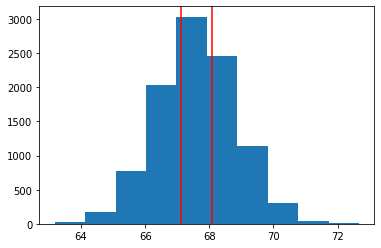

In [54]:
upper_bound = sample1['height'].mean()
lower_bound = null_mean - (sample1['height'].mean() - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [55]:
print(lower_bound,upper_bound)

68.08503621873945 67.11496378126054


In [67]:
sample_means = []
for i in range(10000):
    sample = sample1.sample(5,replace=True)
    sample_mean = sample['height'].mean()
    sample_means.append(sample_mean)

low, high = np.percentile(sample_means,0.5), np.percentile(sample_means,99.5)
print(low,',',high)

plt.hist(sample_means);

[65.95922029032448,
 66.89036478832985,
 66.55472419873186,
 68.39954179501892,
 66.94342204036356,
 67.24379830408286,
 64.57887780645773,
 67.67520336378922,
 67.54636884096692,
 68.6594051138283,
 67.28278407605954,
 66.38690390393286,
 68.6631265599263,
 69.1843803704783,
 65.83038576750216,
 69.22336614245498,
 66.29113943382448,
 69.387464991156,
 65.99820606230115,
 66.38690390393285,
 68.2707072721966,
 68.6594051138283,
 66.16602635710015,
 67.11124233516254,
 68.09916553129963,
 68.6594051138283,
 68.23172150021992,
 68.1028869773976,
 66.39062535003086,
 66.39062535003085,
 66.39062535003086,
 65.95922029032448,
 66.81830896363924,
 68.1028869773976,
 68.6594051138283,
 67.44688292476056,
 65.13539594288841,
 66.72254449353085,
 64.9712970941874,
 68.27070727219662,
 67.50366162289224,
 68.06390120542092,
 67.07597800928386,
 65.56680100259479,
 67.71046768966792,
 67.28278407605954,
 67.9387881286966,
 66.55472419873186,
 69.387464991156,
 66.85137901635318,
 67.50738306899